## Predicting employee attrition using Logistic Regression

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score

hr_data = pd.read_csv('HR_data.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [130]:
X = hr_data.drop('left', axis=1)
y = hr_data['left'].values.ravel()

### Preprocessing features

In [138]:
#Label encoding the salary variable

label_enc = LabelEncoder()
X['salary_level'] = label_enc.fit_transform(X[['salary']])
X_LE = X.drop('salary', axis=1)
X_LE.shape

(14999, 9)

In [132]:
#Dummy Encoding the department variable 

dept_dummies = pd.get_dummies(X_LE['Department'])
merged_X = pd.concat([X_LE, dept_dummies], axis=1)
final_X = merged_X.drop(['Department'], axis=1)
final_X = final_X.drop(['RandD'], axis=1)

final_X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_level,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0


In [133]:
#Define my train and test sets

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.25, random_state=4)
print(X_train.shape)
print(X_test.shape)

(11249, 17)
(3750, 17)


In [134]:
#Create and train my logistic regression model

logreg = LogisticRegression(max_iter=500).fit(X_train, y_train) 

#predict using the model
y_pred = logreg.predict(X_test)

Precision: 0.52 
Recall: 0.244 
F1-Score: 0.333 
Accuracy: 77% 



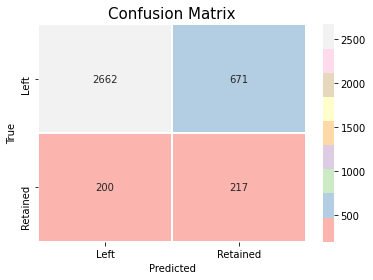

In [135]:
#Define my performance metrics 

cm=confusion_matrix(y_pred,y_test)
class_label = ["Left", "Retained"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(y_test, y_pred, average='binary')
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100), 4) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()